<a href="https://colab.research.google.com/github/Bolanle2/LiverDisease-Classification-DNN/blob/main/final_project_Binf_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
import string
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/"

Mounted at /content/drive
 701hw1.ipynb
 701hw2.ipynb
'701 hw 4b .ipynb'
'730hw 1 .ipynb'
 730hw2.ipynb
'Copy of bde_chp11.ipynb'
'Copy of bde_chpt10.ipynb'
'Copy of bde_chpt7_8.ipynb'
'Copy of bde_chpt9_10.ipynb'
'Copy of bde_chpts_5_6 (1).ipynb'
'Copy of bde_chpts_5_6.ipynb'
'Copy of bdewpchp3_4.ipynb'
'Copy of HW3_wisconsin_Breast_CancerDataset_pytorch.ipynb'
'Copy of HW5 deeplearnong_HIV-1 reverse transcriptase activity.ipynb'
'Copy of [R4DS P01] Explore 100+ Years of Baby Names [Student].ipynb'
 dft.fasta
 drv.fasta
 final_project_Binf_.ipynb
 GSE260666_norm_counts_TPM_GRCh38.p13_NCBI.tsv
'Homework 2AI&deeplearning.ipynb'
 HW3_wisconsin_Breast_CancerDataset_pytorch.ipynb
'HW5 deeplearning.ipynb'
 hw9.ipynb
 metadataa.csv
 metadata.csv
 nvp.fasta
 rpv.fasta
 sequences.zip
 ttc.fasta
 Untitled0.ipynb


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

 701hw1.ipynb
 701hw2.ipynb
'701 hw 4b .ipynb'
'730hw 1 .ipynb'
 730hw2.ipynb
'Copy of bde_chp11.ipynb'
'Copy of bde_chpt10.ipynb'
'Copy of bde_chpt7_8.ipynb'
'Copy of bde_chpt9_10.ipynb'
'Copy of bde_chpts_5_6 (1).ipynb'
'Copy of bde_chpts_5_6.ipynb'
'Copy of bdewpchp3_4.ipynb'
'Copy of HW3_wisconsin_Breast_CancerDataset_pytorch.ipynb'
'Copy of HW5 deeplearnong_HIV-1 reverse transcriptase activity.ipynb'
'Copy of [R4DS P01] Explore 100+ Years of Baby Names [Student].ipynb'
 dft.fasta
 drv.fasta
 final_project_Binf_.ipynb
 GSE260666_norm_counts_TPM_GRCh38.p13_NCBI.tsv
'Homework 2AI&deeplearning.ipynb'
 HW3_wisconsin_Breast_CancerDataset_pytorch.ipynb
'HW5 deeplearning.ipynb'
 hw9.ipynb
 metadataa.csv
 metadata.csv
 nvp.fasta
 rpv.fasta
 sequences.zip
 ttc.fasta
 Untitled0.ipynb


In [ ]:
gene_expr= pd.read_csv("/content/drive/My Drive/Colab Notebooks/GSE260666_norm_counts_TPM_GRCh38.p13_NCBI.tsv", sep="\t")

In [ ]:
gene_expr.head()
num_genes = gene_expr.shape[1]
print("Number of genes:", num_genes)

Number of genes: 16


In [ ]:
gene_expr.head()

,GeneID,GSM8122035,GSM8122036,GSM8122037,GSM8122038,GSM8122039,GSM8122040,GSM8122042,GSM8122043,GSM8122044,GSM8122045,GSM8122046,GSM8122047,GSM8122048,GSM8122049,GSM8122050
0,100287102,0.06365,0.0000,0.00,0.08592,0.1205,0.00,0.05394,0.06356,0.07083,0.1656,0.00,0.3338,0.05723,0.1208,0.00
1,653635,31.30000,17.4800,9.95,13.64000,22.8500,14.52,16.52000,13.30000,27.12000,16.3400,23.22,35.6200,11.73000,13.0100,12.95
2,102466751,40.21000,31.4300,17.26,22.96000,30.7500,24.80,26.21000,16.99000,48.18000,29.5000,34.01,33.4600,16.68000,16.6300,22.73
3,107985730,0.29320,0.1419,0.00,0.00000,0.0000,0.00,0.00000,0.00000,0.21750,0.0000,0.00,0.0000,0.00000,0.0000,0.00
4,100302278,0.76200,0.0000,0.00,0.00000,0.0000,0.00,0.00000,0.00000,0.00000,0.0000,0.00,0.0000,0.00000,0.0000,0.00


In [ ]:
gene_expr= gene_expr.drop("GeneID", axis=1)

In [ ]:
# loading meta data
metadata = pd.read_csv("/content/drive/My Drive/Colab Notebooks/metadataa.csv")

In [ ]:
metadata.head(17)


,SampleID,Condition
0,GSM8122035,Control
1,GSM8122036,Control
2,GSM8122037,Control
3,GSM8122038,Control
4,GSM8122039,Control
5,GSM8122040,Control
6,GSM8122041,NAFL
7,GSM8122042,NAFL
8,GSM8122043,NAFL
9,GSM8122044,NAFL


In [ ]:
metadata= metadata.drop( 6, axis=0)

In [ ]:
X= gene_expr.T
X.head()

,0,1,2,3,4,5,6,7,8,9,...,39366,39367,39368,39369,39370,39371,39372,39373,39374,39375
GSM8122035,0.06365,31.30,40.21,0.2932,0.762,0.0000,0.0,0.3760,1.3060,0.0000,...,38830.0,931.9,897.4,594.6,6398.0,9697.0,7528.0,20400.0,291.6,6501.0
GSM8122036,0.00000,17.48,31.43,0.1419,0.000,0.1351,0.0,0.6707,2.2730,0.0000,...,34500.0,604.0,749.1,389.2,5958.0,8204.0,6014.0,17730.0,165.4,7503.0
GSM8122037,0.00000,9.95,17.26,0.0000,0.000,0.0649,0.0,0.3896,0.5627,0.0000,...,25570.0,332.7,303.3,197.3,6497.0,9461.0,5735.0,15480.0,150.0,7541.0
GSM8122038,0.08592,13.64,22.96,0.0000,0.000,0.0000,0.0,0.2900,3.3450,0.1325,...,29690.0,505.0,471.5,293.9,6174.0,7574.0,5359.0,14700.0,444.1,6508.0
GSM8122039,0.12050,22.85,30.75,0.0000,0.000,0.0000,0.0,0.6510,2.4370,0.5576,...,18930.0,558.4,578.8,373.0,4566.0,5151.0,2909.0,7563.0,458.6,1114.0


In [ ]:
print("Any NaNs in X?", np.isnan(X).any())

Any NaNs in X? 0        False
1        False
2        False
3        False
4        False
         ...  
39371    False
39372    False
39373    False
39374    False
39375    False
Length: 39376, dtype: bool


In [ ]:
print("Any negative values in X?", (X < 0).any())

Any negative values in X? 0        False
1        False
2        False
3        False
4        False
         ...  
39371    False
39372    False
39373    False
39374    False
39375    False
Length: 39376, dtype: bool


In [ ]:
print("Minimum value in X:", X.min())

Minimum value in X: 0           0.00
1           9.95
2          16.63
3           0.00
4           0.00
          ...   
39371    3159.00
39372    2259.00
39373    7165.00
39374      68.40
39375    1114.00
Length: 39376, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
X_log = np.log2(X + 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

In [ ]:
# setting y as the labels
y= metadata["Condition"].values

print(y)

['Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'NAFL' 'NAFL'
 'NAFL' 'NAFL' 'NAFL' 'NASH' 'NASH' 'NASH' 'NASH']


In [ ]:
from sklearn.preprocessing import LabelEncoder # using label enconder from sklearn
 # transforming nafl control and nash into 0,1, and 3
encode=LabelEncoder()
y_encoded = encode.fit_transform(y)
print(y_encoded)

[0 0 0 0 0 0 1 1 1 1 1 2 2 2 2]


In [ ]:
# convert to tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32) #X_scaled
y_tensor = torch.tensor(y_encoded, dtype=torch.long)


In [ ]:
# Spliting data into training and testing, 30% for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.3, shuffle=True, stratify=y_tensor,random_state=42
)


In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(X_train.shape[1], 128),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(128, 64),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(64, 3)
)


In [ ]:
mode2 = torch.nn.Sequential(
    torch.nn.Linear(X_train.shape[1], 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 3)
)

In [ ]:
model3 = torch.nn.Sequential(
    torch.nn.Linear(X_train.shape[1], 32),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(32, 3)
)


In [ ]:

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.0003) #weight_decay=1e-5

Losses = []
n_epochs = 400

for epoch in range(n_epochs):
    model3.train()
    optimizer.zero_grad()

    outputs = model3(X_train)
    loss = loss_fn(outputs, y_train)
    Losses.append(loss.item())

    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")



Epoch 0, Loss: 1.1429359912872314
Epoch 100, Loss: 0.001681322231888771
Epoch 200, Loss: 0.1361055225133896
Epoch 300, Loss: 0.11436070501804352


In [ ]:
print(X_tensor.shape[0], y_tensor.shape[0])  # should be equal


15 15


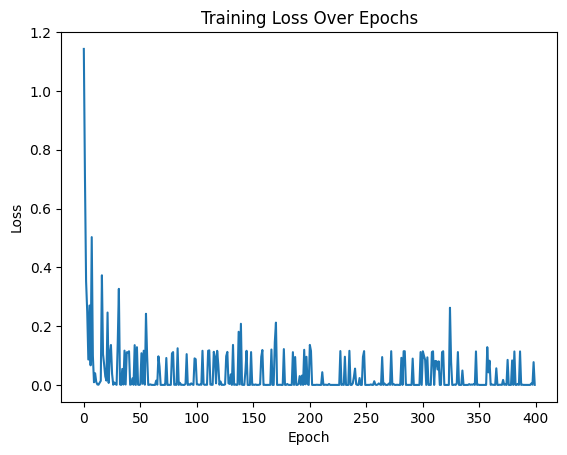

In [ ]:
#ploting the loss over time
fig, ax = plt.subplots()
ax.plot(Losses)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training Loss Over Epochs")
plt.show()

In [ ]:
import torch
from sklearn.metrics import accuracy_score

# Set the model to evaluation mode
model.eval()

# Make predictions (use softmax for multi-class)
with torch.no_grad():  # No need to track gradients
    y_train_pred = torch.argmax(model3(X_train), dim=1)  # Multi-class
    y_test_pred = torch.argmax(model3(X_test), dim=1)  # Multi-class

# Calculate accuracy
train_accuracy = accuracy_score(y_train.numpy(), y_train_pred.numpy())
test_accuracy = accuracy_score(y_test.numpy(), y_test_pred.numpy())

print(f"Accuracy (train): {train_accuracy:.4f}")
print(f"Accuracy (test): {test_accuracy:.4f}")

Accuracy (train): 1.0000
Accuracy (test): 0.8000


In [ ]:
model3.eval()
with torch.no_grad():
    y_pred = model3(X_test)
    predicted_classes = torch.argmax(y_pred, dim=1)
    accuracy = (predicted_classes == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")


Test Accuracy: 1.0000


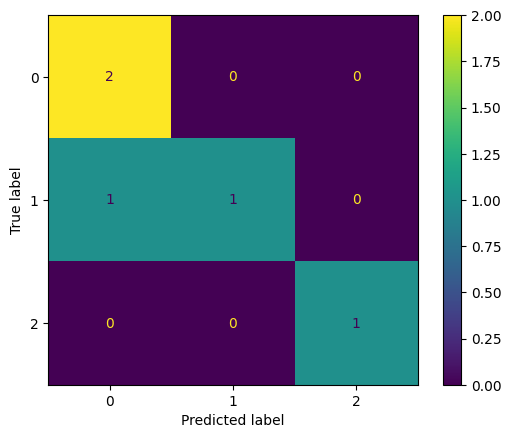

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.numpy(), y_test_pred.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
